In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [405]:
class Oregonator():

    def __init__(self, u, v, f, q, epsilon, Du, Dv, dx, dt, n, timesteps, anim_frames, d, animate_bool):
        if not (1 <= d <= 2):
            raise ValueError(f"{d} is out of bounds for d. d must be 1 or 2.")
        self.d = d
        self.u = u
        self.v = v
        self.f = f
        self.q = q
        self.epsilon = epsilon
        self.Du = Du
        self.Dv = Dv
        self.n = n
        self.animate_bool = animate_bool
        self.anim_frames = anim_frames
        self.dx = dx
        self.dx_sq = self.dx**2
        self.timesteps = timesteps
        stability_condition = (self.dx_sq)/(4*max([Du, Dv]))
        self.frame_skips = self.timesteps/self.anim_frames

        run_funcs = {1: self.run_1d, 2: self.run_2d}

        print((self.dx_sq)/(4*max([Du, Dv])))
        self.dtau = dt
        if stability_condition < self.dtau:
            raise ValueError(f"Timestep is too large, risk of numerical instability. Required timestep: {stability_condition}")
        
        if d == 1:
            self.uv_grid = np.zeros((timesteps, n, 2))
            # self.uv_grid[0,:,0] = np.random.normal(0.5, 0.1, size=(n))
            # self.uv_grid[0,:,1] = np.random.normal(0.25, 0.1, size=(n))
            self.uv_grid[0,:,0] = u
            self.uv_grid[0,:,1] = v
            self.uv_grid[0,0,0] = 0.5
            # self.uv_grid[0,0,1] = 0.6
        
        else:
            self.uv_grid = np.zeros((timesteps, n, n, 2))
            self.uv_grid[0,:,:,0] = np.random.random(size=(n, n))
            self.uv_grid[0,:,:,1] = np.random.random(size=(n, n))

            # self.uv_grid[0,:,:,0] = u
            # self.uv_grid[0,:,:,1] = v
            # self.uv_grid[0,n//2,n//2,0] = 0.5

        # self.uv_grid[0,:,:,0] = np.random.random(size=(n, n))
        # self.uv_grid[0,:,:,1] = np.random.random(size=(n, n))
        # self.uv_grid[0,:,:,0] = 0.5
        # self.uv_grid[0,:,:,1] = 0.5
        # self.uv_grid[0,n//2-1:n//2+1,n//2-1:n//2+1,0] = 0.25
        # self.uv_grid[0,n//2,n//2,1] = 1
        # print(self.uv_grid[0,:,:,0])
        # print(self.)
        # return

        run_funcs[d]()

    # def reaction(self, grid, i, j):
        
    #     return

    def plotheatmap(self, u_k, k):
    # Clear the current plot figure
        plt.clf()
        plt.title(f"u at t = {k*self.dtau:.3f} unit time")
        plt.xlabel("x")
        plt.ylabel("y")
    
        # This is to plot u_k (u at time-step k)
        plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0.49, vmax=0.51)
        plt.colorbar()
        return plt
    
    def load_frame(self, k):
        # (self.timesteps/self.anim_frames)*k
        frame_skips = self.timesteps/self.anim_frames
        self.plotheatmap(self.uv_grid[int(frame_skips*k),:,:,0], int(frame_skips*k))


    def run_1d(self):
        
        print('test')
        # return
        # print(self.timesteps)
        for t in range(self.timesteps-1):
            
            for i in range(self.n):
                
                uv = self.uv_grid
                # print(uv.shape)
                u = uv[t, i, 0]
                v = uv[t, i, 1]
                u_grid = uv[t, :, 0]
                # print(u_grid.shape)
                v_grid = uv[t, :, 1]
                
                if i == 0 or i == (self.n - 1):
                    # no flux boundary conditions
                    Diff_u = 0
                    Diff_v = 0
                else:
                    Diff_u = (self.Du/self.dx_sq)*(u_grid[(i+1)%self.n] + u_grid[(i-1)%self.n] - 2*u)
                    Diff_v = (self.Dv/self.dx_sq)*(v_grid[(i+1)%self.n]+ v_grid[(i-1)%self.n] - 2*v)
                    # Diff_u = 0
                    # Diff_v = 0                   

                uv[t+1, i, 0] = self.dtau*((1/self.epsilon)*(u*(1-u) - (self.f*v*(u-self.q)/(u+self.q))) + Diff_u) + u
                # print(u, '>', uv[t+1, i, 0])
                uv[t+1, i, 1] = self.dtau*(u - v + Diff_v) + v
                # print(v, '>', uv[t+1, i, 1])
                                    # print(t, i, j, uv[t+1, i, j, 0])
        # if t == 0:
            #     self.uv_grid[0,self.n//2,self.n//2,0] = self.u
        
        if self.animate_bool:
            # self.animate(self.anim_frames)
            self.plot_1d()
            self.spat_temp()

    def run_2d(self):
                # print(self.timesteps)
        for t in range(self.timesteps-1):
            for i in range(self.n):
                for j in range(self.n):
                    uv = self.uv_grid
                    # print(uv.shape)
                    u = uv[t, i, j, 0]
                    v = uv[t, i, j, 1]
                    u_grid = uv[t, :, :, 0]
                    # print(u)
                    v_grid = uv[t, :, :, 1]
                    
                    if i == 0 or i == (self.n - 1) or j == 0 or j == (self.n - 1):
                        # No flux boundaries
                        Diff_u = 0
                        Diff_v = 0
                    else:
                    # if True:
                        Diff_u = (self.Du/self.dx_sq)*(u_grid[(i+1)%self.n][j]+ u_grid[(i-1)%self.n][j]+ u_grid[i][(j+1)%self.n] + u_grid[i][(j-1)%self.n] - 4*u)
                        Diff_v = (self.Dv/self.dx_sq)*(v_grid[(i+1)%self.n][j]+ v_grid[(i-1)%self.n][j]+ v_grid[i][(j+1)%self.n] + v_grid[i][(j-1)%self.n] - 4*v)
                    
                    # Diff_u = 0
                    # Diff_v = 0

                    uv[t+1, i, j, 0] = self.dtau*((1/self.epsilon)*(u*(1-u) - (self.f*v*(u-self.q)/(u+self.q))) + Diff_u) + u
                    # print(t, i, j, uv[t+1, i, j, 0])
                    uv[t+1, i, j, 1] = self.dtau*(u - v + Diff_v) + v
                                        # print(t, i, j, uv[t+1, i, j, 0])
            #     self.uv_grid[0,self.n//2,self.n//2,0] = self.u
        
        if self.animate_bool:
            # self.animate(self.anim_frames)
            self.plot_multiple(self.anim_frames)

    def animate(self, k):
        self.anim_frames = k
        anim = animation.FuncAnimation(plt.figure(), self.load_frame, interval=.1,frames=k, repeat=False)
        # anim.save(f"BZ_f_{self.f}_q_{self.q}_Du_{self.Du}_Dv_{self.Dv}_epsilon_{self.epsilon}_u0_{self.u}_v0_{self.v}_{self.anim_frames}frames_corrected.gif")
        anim.save("testing.gif")
    
    def plot_multiple(self, k):
        
        frame_skips = self.timesteps/self.anim_frames
        
        for frame in range(k):
            print(int(frame_skips*frame))
            plt.imshow(self.uv_grid[int(frame_skips*frame),:,:,0], cmap=plt.cm.jet, vmin=0, vmax=1)
            plt.colorbar()
            plt.show()

    def plot_1d(self):
        fig, axs = plt.subplots(3)
        # t = self.
        t = np.arange(self.uv_grid.shape[0])

        u = self.uv_grid[:,0,0]
        v = self.uv_grid[:,0,1]
        axs[0].plot(t, u, label=r'$u$')
        axs[0].plot(t, v, label=r'$v$')
        axs[0].set_title('x = 0')

        u = self.uv_grid[:,self.n//2,0]
        v = self.uv_grid[:,self.n//2,1]
        axs[1].plot(t, u, label=r'$u$')
        axs[1].plot(t, v, label=r'$v$')
        axs[1].set_title(f'x = {self.timesteps//2}')

        u = self.uv_grid[:,-1,0]
        v = self.uv_grid[:,-1,1]
        axs[2].plot(t, u, label=r'$u$')
        axs[2].plot(t, v, label=r'$v$')
        axs[2].set_title(f'x = {self.timesteps}')

        plt.xlabel(f'time')
        plt.ylabel('concentration')

        ####################################

        # x = np.arange(self.uv_grid.shape[1])

        # u = self.uv_grid[0,:,0]
        # v = self.uv_grid[0,:,1]
        # axs[0].plot(x, u, label=r'$u$')
        # axs[0].plot(x, v, label=r'$v$')

        # u = self.uv_grid[self.timesteps//2,:,0]
        # v = self.uv_grid[self.timesteps//2,:,1]
        # axs[1].plot(x, u, label=r'$u$')
        # axs[1].plot(x, v, label=r'$v$')

        # u = self.uv_grid[-1,:,0]
        # v = self.uv_grid[-1,:,1]
        # axs[2].plot(x, u, label=r'$u$')
        # axs[2].plot(x, v, label=r'$v$')

        # plt.xlabel('position')
        # plt.ylabel('concentration')

        plt.legend()
        plt.show()

    def spat_temp(self):
        print(self.uv_grid.shape)
        plt.imshow(self.uv_grid[:,:,0].T, cmap=plt.cm.gray)
        plt.xlabel('time')
        plt.ylabel('position')
        plt.show()







0.0625
0


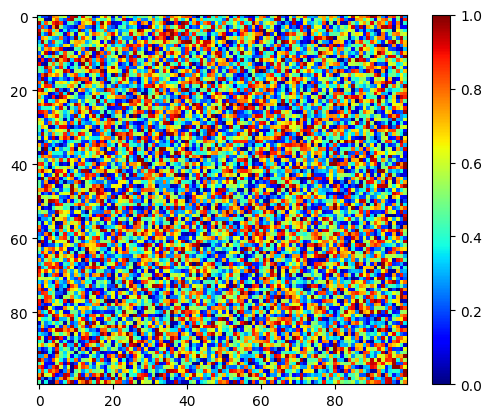

100


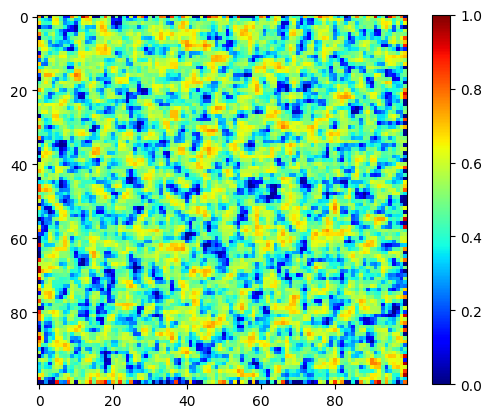

200


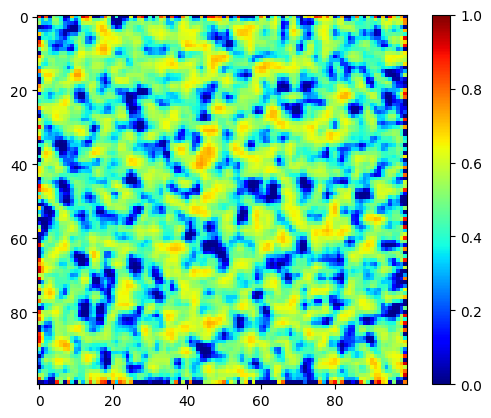

300


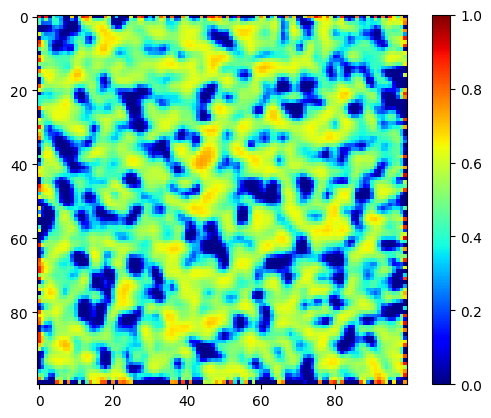

400


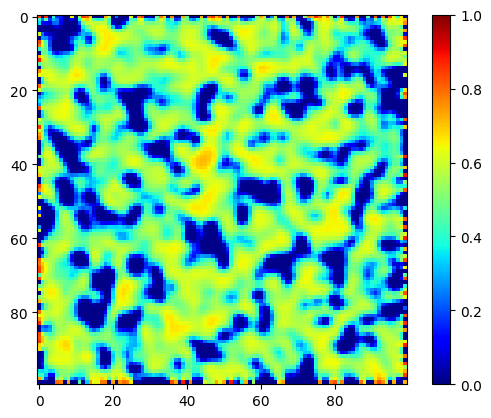

500


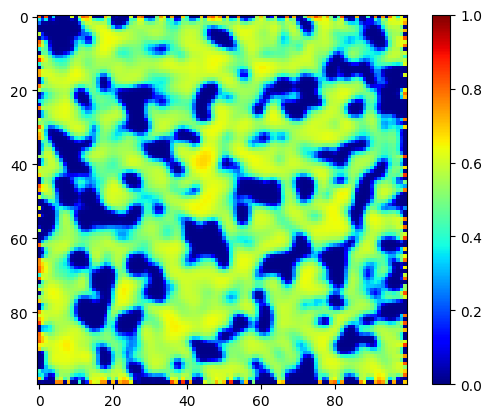

600


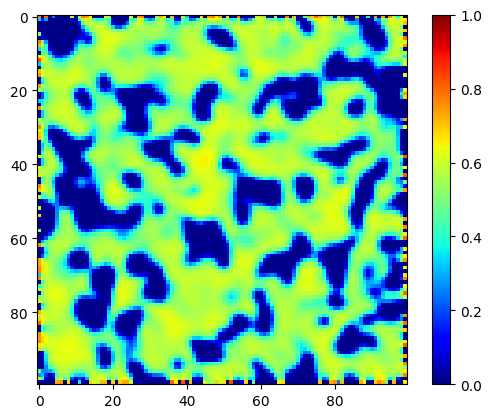

700


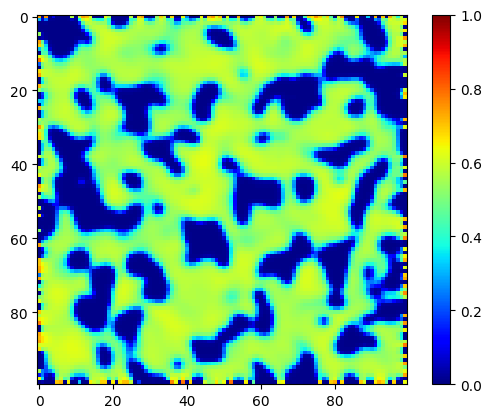

800


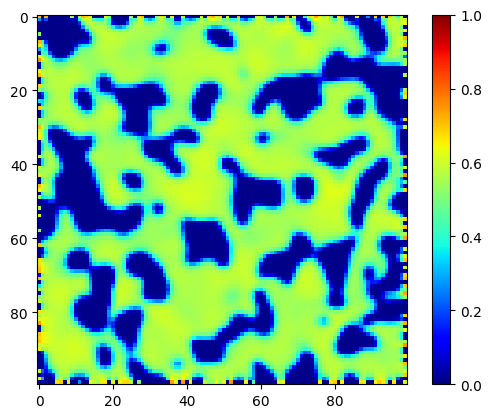

900


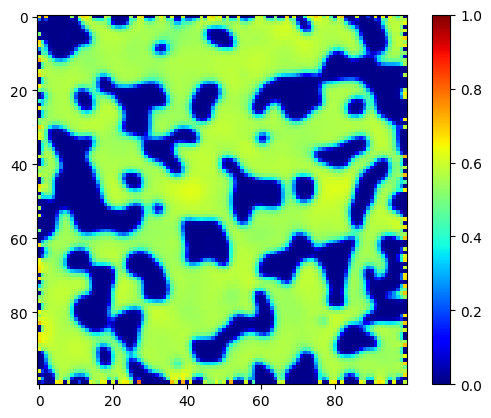

In [406]:
# Working 1d params
# u = 0.01
# v = 0.1

# epsilon = .1
# Du = 0.1
# Dv = 0.1
# f = 1
# q = 0.01
# dx = 0.1
# dt = 1/100
# n = 100
# timesteps = 1000


u = 0.01
v = 0.1

epsilon = .05
Du = 1
Dv = 1
f = 0.5
q = 0.01
dx = 0.5
dt = 1/1000

n = 100
timesteps = 1000
anim_frames = 10
d = 2 # 1d or 2d
ogn = Oregonator(u, v, f, q, epsilon, Du, Dv, dx, dt, n, timesteps, anim_frames, d, True)

In [331]:
ogn.animate(100)

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x0000021221499EE0> (for post_execute):


IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

<Figure size 640x480 with 0 Axes>

In [ ]:
print(ogn.uv_grid[-1,:,:,0])

[[0.72672103 0.72672103 0.72672103 ... 0.72672103 0.72672103 0.72672103]
 [0.72672103 0.72672103 0.72672103 ... 0.72672103 0.72672103 0.72672103]
 [0.72672103 0.72672103 0.72672103 ... 0.72672103 0.72672103 0.72672103]
 ...
 [0.72672103 0.72672103 0.72672103 ... 0.72672103 0.72672103 0.72672103]
 [0.72672103 0.72672103 0.72672103 ... 0.72672103 0.72672103 0.72672103]
 [0.72672103 0.72672103 0.72672103 ... 0.72672103 0.72672103 0.72672103]]


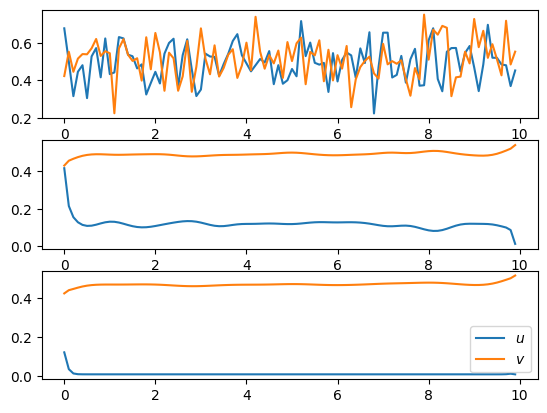

In [ ]:
fig, axs = plt.subplots(3)
# t = ogn.
x = np.arange(ogn.uv_grid.shape[1])*ogn.dx
u = ogn.uv_grid[0,ogn.n//2,:,0]
v = ogn.uv_grid[0,ogn.n//2,:,1]

axs[0].plot(x, u, label=r'$u$')
axs[0].plot(x, v, label=r'$v$')

u = ogn.uv_grid[ogn.timesteps//2,ogn.n//2,:,0]
v = ogn.uv_grid[ogn.timesteps//2,ogn.n//2,:,1]

axs[1].plot(x, u, label=r'$u$')
axs[1].plot(x, v, label=r'$v$')
u = ogn.uv_grid[-1,ogn.n//2,:,0]
v = ogn.uv_grid[-1,ogn.n//2,:,1]

axs[2].plot(x, u, label=r'$u$')
axs[2].plot(x, v, label=r'$v$')
# axs[2].set_ylim(0.1225, 0.1275)
plt.legend()
plt.show()

In [ ]:
print()